# Examen

## Juan Jesús Rodríguez Martínez

In [87]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### Problema 1

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \cos(x)
$$

$$
z(x) = \sin(x)
$$

$$
w(x) = \frac{1}{\sin(x) + \cos(2x)}
$$

In [2]:
x= sym.Symbol('x')

In [89]:
y=sym.cos(x)
y

cos(x)

In [4]:
z=sym.sin(x)
z

sin(x)

In [5]:
w=1/(sym.sin(x)+sym.cos(2*x))
w

1/(sin(x) + cos(2*x))

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$


In [51]:
g=y*z
print("La derivada de g(x) es ")
sym.diff(g)

La derivada de g(x) es 


-sin(x)**2 + cos(x)**2

(c) Grafica $w(x)$ en el rango $[0,1]$


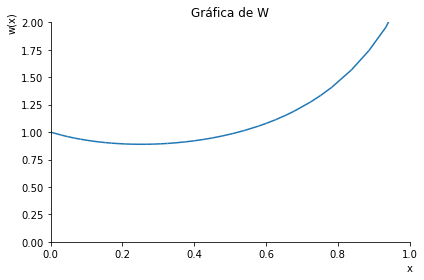

In [83]:
sym.plot(w,xlim=(0,1),ylim=(0,2),title='Gráfica de W',ylabel="w(x)")

(d) Integra de manera indefinida $g(x)$ y luego evalúala desde $0$ a $1$.

In [62]:
print("La integral de g(x) es ")
sym.integrate(g)

La integral de g(x) es 


sin(x)**2/2

In [68]:
print("La integral definida de g(x) en el intervalo de 0 a 1 es ")
sym.integrate(g,(x,0,1))

La integral definida de g(x) en el intervalo de 0 a 1 es 


sin(1)**2/2

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

In [43]:
print("El límite de y(x) cuando x tiende a 0 es: ",sym.limit(y,x,0))

El límite de y(x) cuando x tiende a 0 es  1


In [44]:
print("El límite de z(x) cuando x tiende a 0 es: ",sym.limit(z,x,0))

El límite de z(x) cuando x tiende a 0 es  0


In [45]:
print("El límite de g(x) cuando x tiende a 0 es: ",sym.limit(g,x,0))

El límite de g(x) cuando x tiende a 0 es  0


In [46]:
print("El límite de w(x) cuando x tiende a 0 es: ",sym.limit(w,x,0))

El límite de w(x) cuando x tiende a 0 es  1


(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

In [93]:
sym.series(y,x)

1 - x**2/2 + x**4/24 + O(x**6)

In [91]:
sym.series(z,x)

x - x**3/6 + x**5/120 + O(x**6)

### Problema 2

El [**atractor de Rössler**](http://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$

$$
\frac{dy}{dt} = x + ay
$$

$$
\frac{dz}{dt} = b + z(x-c)
$$

(a) Resuelva las ecuaciones numéricamente para 

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$

y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$

use el método de Runge-Kutta de 2do orden.

In [111]:
#constantes
a=0.13
b=0.2
c=6.5

In [ ]:
def RK2(y, t, dt, derivadas):
    k0 = dt*derivadas(y, t)
    k1 = dt*derivadas(y + k0, t + dt)
    y_next = y + 0.5*(k0 + k1)
    
    return y_next

(b) Muestra en una gráfica el comportamiento de las soluciones en el tiempo (i.e. grafica $x(t)$, $y(t)$ y $z(t)$).

Sean
$$
\phi=x
$$

$$
\dot\phi=-y-z
$$

$$
\omega=y
$$

$$
\dot\omega=x+ay
$$

$$
\theta=z
$$

$$
\dot\theta=b+z(x-c)
$$

In [123]:
def Rossler(estado,tiempo):
    g0=estado[0]
    g1=-estado[2]-estado[4]
    g2=estado[2]
    g3=estado[0]+a*estado[2]
    g4=estado[4]
    g5=b+estado[4]*(estado[0]-c)
    return np.array([g0,g1,g2,g3,g4,g5])

In [ ]:
#condiciones iniciales
i=np.zeros([6])
i[-1]=b

In [124]:
solucion=odeint(func=Rossler,y0=i,t=np.linspace(0,25,1000))

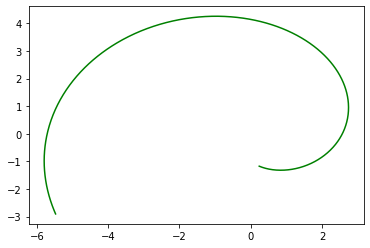

In [128]:
xdata = (1+solucion[:,5])*np.sin(solucion[:,5])
ydata = -(1+solucion[:,5])*np.cos(solucion[:,5])
plt.plot(xdata,ydata,'g-')

(c) Muestra como se ve el **atractor de Rössler** en 3D (i.e. en el espacio).